# KNN

這是一個分類的問題，使用KNN演算法將花的資料進行分類，KNN如何運作？

KNN：可以用來做分類任務
KNN的概念就是，KNN依照要預測的資料點周圍鄰近的K個資料點的類別，看要預測資料點周圍的哪個類別的資料比較多則將預測資料點分類為類別多的類別。
KNN在計算上面要先計算所有資料點之間的距離


In [3]:
import numpy as np
from sklearn import datasets #sklearn 中的數據庫
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

iris = datasets.load_iris()#從資料集中匯入iris資料集
iris_X=iris.data#iris的data屬性(資料的自變數)
iris_y=iris.target#iris的目標屬性(i.e.資料的目標變數)

print(iris_X[:2,:])#印出資料中的0,1列的所有行的資料


[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]]


In [4]:
print(iris_y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [5]:
#將資料分為訓練以及測試資料，測試資料佔比三成
X_train,X_test,y_train,y_test = train_test_split(iris_X,
                                                iris_y,test_size=0.3)


In [6]:
print(y_train)

[0 2 0 1 1 1 1 2 2 0 0 2 2 0 0 0 1 2 2 1 2 0 0 0 2 1 1 0 0 2 2 2 0 0 0 2 2
 2 1 1 2 1 1 0 0 2 1 2 2 0 1 1 1 2 1 1 1 2 1 0 0 2 0 1 1 0 0 0 2 0 0 1 0 2
 2 2 1 0 0 2 0 0 2 1 0 1 2 1 1 1 2 2 0 1 1 1 0 0 1 1 2 2 2 1 1]


In [7]:
#將訓練好的分類器fit到訓練資料上面
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train,y_train)
print(knn.predict(X_test))#使用以訓練資料訓練好的KNN用來預測測試資料的目標變數
print(y_test)#印出測試資料的目標變數

[2 1 1 2 2 0 0 1 1 1 1 1 0 2 0 1 2 0 0 0 2 1 2 2 1 1 0 2 2 1 0 0 0 1 2 0 0
 2 0 1 2 2 0 2 1]
[2 1 1 2 2 0 0 1 1 1 1 1 0 2 0 2 2 0 0 0 2 1 2 2 1 1 0 2 2 1 0 0 0 1 2 0 0
 2 0 1 2 2 0 2 1]


In [1]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression

loaded_data=datasets.load_boston()

In [2]:
data_X=loaded_data.data
data_y=loaded_data.target

In [3]:
model = LinearRegression()

In [4]:
model.fit(data_X,data_y)

LinearRegression()

In [5]:
print(model.predict(data_X[:4,:]))
print(data_y[:4])

[30.00384338 25.02556238 30.56759672 28.60703649]
[24.  21.6 34.7 33.4]


coef:是線性回歸的係數
intercept：與y軸交點

In [7]:
print(model.coef_)

[-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]


In [8]:
print(model.intercept_)

36.459488385090125


In [9]:
print(model.get_params())
#返回默認參數

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}


# R^2 coeffient of determination?

## 代表精確度百分比

In [10]:
print(model.score(data_X,data_y))#R^2 coeffient of determination

0.7406426641094095


# Normalized 標準化

In [12]:
from sklearn import preprocessing
import numpy as np

In [14]:
a = np.array([[10,2.7,3.6],
             [-100,5,-2],
             [120,20,40]],dtype=np.float64)

print(a)

[[  10.     2.7    3.6]
 [-100.     5.    -2. ]
 [ 120.    20.    40. ]]


# Normalized Data

In [15]:

print(preprocessing.scale(a))

[[ 0.         -0.85170713 -0.55138018]
 [-1.22474487 -0.55187146 -0.852133  ]
 [ 1.22474487  1.40357859  1.40351318]]


第一個問題:Feature Scaling 的等高線：等高線是Loss，Gradient Descent會去尋找等高
線的最低點，
為什麼要做Feature Scaling的原因
是因為說假設今天我們的數據一組x1從0-50，一組x2從500-2000，
兩者對y的影響不一樣，（x1乘上較大的w1，x2乘上較小的w2），
w1對於y來說會是有較小影響力的，w2對y是有較大的影響力的，所以也就是說w1對Loss Function也有較小
影響力，w2對Loss Function 有較大影響力，這對於Gradient Descent來說是很麻煩的，
Gradient Descent是以Loss對W的微分來考慮下一個W的去向，而每次w移動的多寡取決於Learning Rate的
大小，而今天w對loss影響不同，可能會變成是w的移動跳耀，不一定能找到最小的Loss。
所以才要做Feature Scaling。
第二個問題是:samples_generator/make_classification
第三個問題是：svm SVC

train_test_split : 分開訓練與測試資料


In [17]:
from sklearn.model_selection import train_test_split 
from sklearn.datasets.samples_generator import make_classification
from sklearn.svm import SVC
import matplotlib.pyplot as plt

In [44]:
X,y = make_classification(n_samples=300,n_features=2,n_redundant=0,n_informative=2,
                         random_state=22,n_clusters_per_class=1,scale=100)

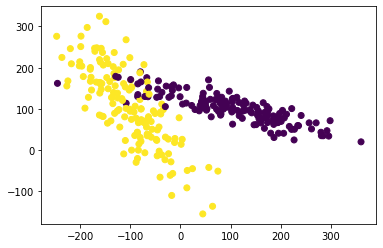

In [19]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [35]:
#X=preprocessing.minmax_scale(X,feature_range=(-1,1))



# 經過normalized 的data

In [45]:
X=preprocessing.scale(X)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
clf=SVC()
clf.fit(X_train,y_train)

SVC()

In [46]:
print(clf.score(X_test,y_test))

0.9555555555555556


# 沒有經過normalized的data

## random_state:代表說你將你？？？

In [41]:
X,y = make_classification(n_samples=300,n_features=2,n_redundant=0,n_informative=2,
                         random_state=22,n_clusters_per_class=1,scale=100)

In [42]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
clf=SVC()
clf.fit(X_train,y_train)

SVC()

In [43]:
print(clf.score(X_test,y_test))

0.9


In [71]:
from sklearn.datasets import load_iris
data=load_iris()


In [72]:
data['data'][:5][:] #查看資料前五行

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [69]:
type(data)

tuple

In [ ]:
Cross Validation 

In [82]:
from sklearn.datasets import load_iris# 資料來源
from sklearn.model_selection import train_test_split #評估資料用
import matplotlib.pyplot  as plt#畫出模型分數
from sklearn.neighbors import KNeighborsClassifier#模型
iris=load_iris() #load_iris() 是sklearn的函式
X=iris.data 
y=iris.target
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=4)
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
print(knn.score(X_test,y_test))

0.9736842105263158


使用Cross_validation_score  

In [83]:
from sklearn.model_selection import cross_val_score
knn=KNeighborsClassifier(n_neighbors=5)
scores=cross_val_score(knn,X,y,scoring='accuracy')
print(scores)

[0.96666667 1.         0.93333333 0.96666667 1.        ]


In [84]:
print(scores.mean())

0.9733333333333334


想知道如何找到最好的k值，所以運用k_range(1,31)

In [106]:
k_range=range(1,31)
k_scores=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,X,y,cv=10,scoring='accuracy')
    #loss=-cross_val_score(knn,X,y,cv=10,scoring='mean_squared_error')
    k_scores.append(scores.mean())

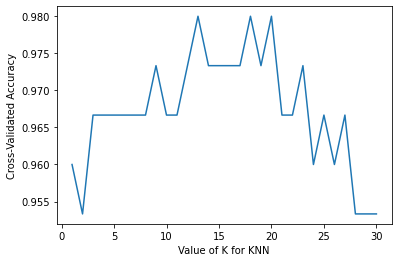

In [107]:
plt.plot(k_range,k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [116]:
k0_range=range(1,31)
k0_scores=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    #scores=cross_val_score(knn,X,y,cv=10,scoring='accuracy')
    loss=-cross_val_score(knn,X,y,cv=10,scoring='neg_mean_squared_error')
    k0_scores.append(loss.mean())

這邊將k每次都變換，range從(1,31)，針對每個k做Cross_validation當中的MSE，並每次將損失做平均

In [119]:
k0_scores

[0.04,
 0.04666666666666667,
 0.03333333333333334,
 0.03333333333333334,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.026666666666666665,
 0.03333333333333333,
 0.03333333333333333,
 0.026666666666666665,
 0.02,
 0.026666666666666665,
 0.026666666666666665,
 0.026666666666666665,
 0.026666666666666665,
 0.02,
 0.026666666666666665,
 0.02,
 0.03333333333333334,
 0.03333333333333334,
 0.026666666666666665,
 0.04,
 0.03333333333333334,
 0.04,
 0.03333333333333334,
 0.04666666666666667,
 0.04666666666666667,
 0.04666666666666667]

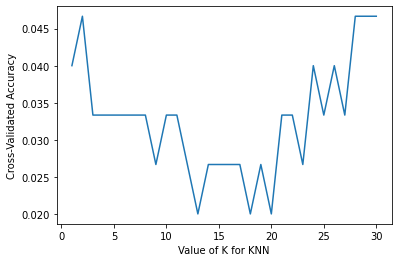

In [118]:
plt.plot(k_range,k0_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [100]:
loss

array([0.06666667, 0.06666667, 0.        , 0.06666667, 0.        ,
       0.13333333, 0.06666667, 0.06666667, 0.        , 0.        ])

In [120]:
from  sklearn.model_selection import learning_curve
from sklearn.datasets import load_digits
from sklearn.svm import SVC
import matplotlib.pyplot  as plt
import numpy as np

SVC:Support Vector Classification
gamma是支援向量機的函式當中的一個參數，在函數當中用sigma表示，
支援向量機，用來分類資料的一個演算法，會在資料中找一條函式
能夠妥善的分類資料，而資料若需要用到非線性的函式進行分類的時候
就會需要將資料投影到高維度空間，並且找一個平面分類這些資料，
而通常這個將資料分類的函式會叫做Kernal：
Linear kernal,線性
polynomial kernal,多項式
Gaussian Radial Function Kernal(RBF) 



In [ ]:
digit:共有1797筆資料（每筆資料是8*8的圖像資料)

In [134]:
print(digits.data.shape)

(1797, 64)


<Figure size 432x288 with 0 Axes>

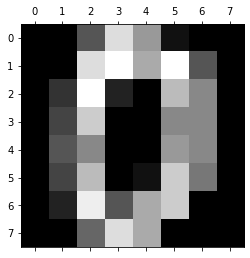

In [137]:
plt.gray()######show images in grayscale as default
plt.matshow(digits.images[0])
plt.show()

# 一個8*8的digit圖片，是以64個pixel組合而成的，所以每一個圖片共有8個array每個array有8個值

In [138]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [141]:
digits_df=load_digits(as_frame=True)

In [145]:
digits_df

{'data':       pixel_0_0  pixel_0_1  pixel_0_2  pixel_0_3  pixel_0_4  pixel_0_5  \
 0           0.0        0.0        5.0       13.0        9.0        1.0   
 1           0.0        0.0        0.0       12.0       13.0        5.0   
 2           0.0        0.0        0.0        4.0       15.0       12.0   
 3           0.0        0.0        7.0       15.0       13.0        1.0   
 4           0.0        0.0        0.0        1.0       11.0        0.0   
 ...         ...        ...        ...        ...        ...        ...   
 1792        0.0        0.0        4.0       10.0       13.0        6.0   
 1793        0.0        0.0        6.0       16.0       13.0       11.0   
 1794        0.0        0.0        1.0       11.0       15.0        1.0   
 1795        0.0        0.0        2.0       10.0        7.0        0.0   
 1796        0.0        0.0       10.0       14.0        8.0        1.0   
 
       pixel_0_6  pixel_0_7  pixel_1_0  pixel_1_1  ...  pixel_6_6  pixel_6_7  \
 0        

In [140]:
digits=load_digits()
X=digits.data
y=digits.target
train_sizes,train_loss,test_loss=learning_curve(SVC(gamma=0.001),X,y,cv=10,
                                                    scoring='neg_mean_squared_error',
                                                   train_sizes=[0.1,0.25,0.5,0.75,1])
                                               
train_loss_mean=-np.mean(train_loss,axis=1)
test_loss_mean=-np.mean(test_loss,axis=1)

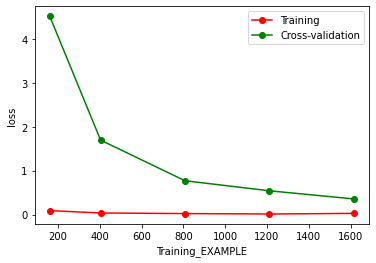

In [132]:
plt.plot(train_sizes,train_loss_mean,'o-',color='r',label='Training')
plt.plot(train_sizes,test_loss_mean,'o-',color='g',label='Cross-validation')
plt.xlabel('Training_EXAMPLE')
plt.ylabel('loss')
plt.legend(loc='best')
plt.show()

What is gamma? SVC的超參數
why Validation_curve?: 觀察不同gamma值下，訓練分數與驗證的分數變化，gamma越大，過擬合，gamma過小，
欠擬合，所以要找一個合適的gamma
why param_range=np.logspace? 是用以建立等比級數，常用的三個引數，
分別是起始點指數，引數終止點指數，表示數列的個數





In [1]:
from  sklearn.model_selection import validation_curve
from sklearn.datasets import load_digits
from sklearn.svm import SVC
import matplotlib.pyplot  as plt
import numpy as np

In [2]:
digits=load_digits()
X=digits.data
y=digits.target
param_range=np.logspace(-6,-2.3,5)
train_loss,test_loss=validation_curve(SVC(),X,y,param_name='gamma',param_range=param_range,cv=10,
                                                    scoring='neg_mean_squared_error'
                                                   )
                                               
train_loss_mean=-np.mean(train_loss,axis=1)
test_loss_mean=-np.mean(test_loss,axis=1)

In [6]:
param_range

array([1.00000000e-06, 8.41395142e-06, 7.07945784e-05, 5.95662144e-04,
       5.01187234e-03])

# EXAMPLE:Start:1,End:10,Count:10,
# e：10的次方
# 1.e+01:10^1＝10

In [5]:
np.logspace(1,10,10)

array([1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06, 1.e+07, 1.e+08,
       1.e+09, 1.e+10])

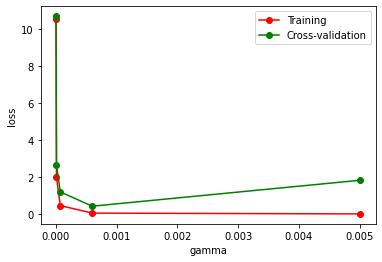

In [4]:
plt.plot(param_range,train_loss_mean,'o-',color='r',label='Training')
plt.plot(param_range,test_loss_mean,'o-',color='g',label='Cross-validation')
plt.xlabel('gamma')
plt.ylabel('loss')
plt.legend(loc='best')
plt.show()